# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
# !pip install --upgrade numpy==1.26.4
# !pip install --upgrade pandas==2.2.2
# !pip install --upgrade nltk==3.9.1
# !pip install --upgrade spacy==3.7.5
# !pip install --upgrade scipy==1.12
# !pip install --upgrade pydantic==2.10.5
# !pip install wordcloud==1.9.4
# !python -m spacy download en_core_web_sm

## Importing the necessary libraries

In [82]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import string  # For handling string-related operations
import gensim.downloader as api # for Downloading Models
# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')
# For interactive plots
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)
from sklearn.model_selection import train_test_split
# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [28]:
## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [29]:
# Import the first file - True.csv
data_true=pd.read_csv('True.csv')
# Import the second file - Fake.csv
data_fake=pd.read_csv('Fake.csv')

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [30]:
# Inspect the DataFrame with True News to understand the given data
data_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017   
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017   
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017

In [31]:
# Inspect the DataFrame with Fake News to understand the given data
data_fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text               date  
0  Donald Trump just couldn t wish all Americans ...  December 31, 2017  
1  House Intelligence Committee Chairman Devin Nu...  December 31, 2017  
2  On Friday, it was revealed that former Milwauk...  December 30, 2017  
3  On Christmas day, Donald Trump announced that ...  December 29, 2017  
4  Pope Francis used his annual Christmas Day mes...  December 25, 2017

In [32]:
# Print the column details for True News DataFrame
# Checking Column names and datatypes in true data set
data_true.info()
print("#"*70)
data_true.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB
######################################################################


title  \
count                                               21417   
unique                                              20826   
top     Factbox: Trump fills top jobs for his administ...   
freq                                                   14   

                                                     text                date  
count                                               21417               21417  
unique                                              21192                 716  
top     (Reuters) - Highlights for U.S. President Dona...  December 20, 2017   
freq                                                    8                 182

In [33]:
# Print the column details for Fake News Dataframe
# Checking Column names and datatypes in fake data set
data_fake.info()
print("#"*70)
data_fake.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB
######################################################################


title   text          date
count                                               23502  23502         23481
unique                                              17914  17466          1692
top     MEDIA IGNORES Time That Bill Clinton FIRED His...         May 10, 2017
freq                                                    6    626            46

In [34]:
# Print the column names of both DataFrames
print(data_true.columns)
print(data_fake.columns)

Index(['title', 'text', 'date'], dtype='object')
Index(['title', 'text', 'date'], dtype='object')


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [35]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
data_true['news_label'] = 1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
data_fake['news_label'] = 0

In [36]:
#Checking both the dataframes one by one
# data_true.head(5)
# data_fake.head(5)

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [37]:
# Combine the true and fake news DataFrames into a single DataFrame
true_fake_dataset = pd.concat([data_true, data_fake], axis=0)
true_fake_dataset.head(5)

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  \
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017    
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017    
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017    
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017    
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017    

   news_label  
0           1  
1           1  
2           1  
3           1  
4           1

In [38]:
# confirming if boht the data sets are merged properly
print(true_fake_dataset["news_label"].value_counts())

news_label
0    23523
1    21417
Name: count, dtype: int64


In [39]:
# Display the first 5 rows of the combined DataFrame to verify the result
true_fake_dataset.head(5)

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  \
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017    
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017    
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017    
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017    
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017    

   news_label  
0           1  
1           1  
2           1  
3           1  
4           1

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [40]:
# Check Presence of Null Values
true_fake_dataset.isnull().sum()

title         21
text          21
date          42
news_label     0
dtype: int64

In [41]:
# Handle Rows with Null Values
# As we can see that there are 21 nulls in title, text and 42 nulls in news label. 
# so we can remove these nulls as they dont provide any use to us 

true_fake_dataset = true_fake_dataset.dropna()
true_fake_dataset.isnull().sum()

title         0
text          0
date          0
news_label    0
dtype: int64

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [42]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
true_fake_dataset['news_text'] = true_fake_dataset['title'].astype(str) + ' ' + true_fake_dataset['text'].astype(str)

# Drop the irrelevant columns from the DataFrame as they are no longer needed
true_fake_dataset=true_fake_dataset.drop(['title','date', 'text'], axis = 1)

# Display the first 5 rows of the updated DataFrame to check the result
true_fake_dataset.head(5)


news_label                                          news_text
0           1  As U.S. budget fight looms, Republicans flip t...
1           1  U.S. military to accept transgender recruits o...
2           1  Senior U.S. Republican senator: 'Let Mr. Muell...
3           1  FBI Russia probe helped by Australian diplomat...
4           1  Trump wants Postal Service to charge 'much mor...

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [43]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
# Lets suffle the dataset so that it does not create probelems in training
df_clean = true_fake_dataset.sample(frac = 1)

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [44]:
# Write the function here to clean the text and remove all the unnecessary elements
def text_cleanup(text):
    text = text.lower() # this conver uppercase to lower case 
    text = re.sub('\[.*?\]','',text) # this will remove square brackets and content within
    text = re.sub("\\W"," ",text) # this will remove square brackets and content within
    text = re.sub('https?://\S+|www\.\S+','',text) # this will remove urls 
    text = re.sub('<.*?>+','',text) # this will remove html tags if any
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text) # this will remove punctuation
    text = re.sub('\w*\d\w*','',text)  # This will remove words with numbers
    return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [45]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['cleaned_text'] = df_clean['news_text'].apply(text_cleanup)
df_clean.head()

news_label                                          news_text  \
13007           0  OUCH! The Left’s “Other Woman” Just Landed A D...   
13405           0  DINESH D’SOUZA BRILLIANTLY Schools Hollywood R...   
12022           0  ARE ANGRY LEFTISTS Planning Violent Communist ...   
16077           1  Fake news hurts trust in media, mainstream out...   
22687           0  BOILER ROOM – EP #44 – Dig, Dug, Dirt! Tune in...   

                                            cleaned_text  
13007  ouch  the left s  other woman  just landed a d...  
13405  dinesh d souza brilliantly schools hollywood r...  
12022  are angry leftists planning violent communist ...  
16077  fake news hurts trust in media  mainstream out...  
22687  boiler room   ep     dig  dug  dirt  tune in t...

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [ ]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('averaged_perceptron_tagger_eng') #  download only oncw as it will take some time to compelte
print("Downloaded")
def nouns_processing(text):
    stop_words = set(stopwords.words('english')) # removing english stop words
    lemmatizer = WordNetLemmatizer() # doing lemmatization to keep single word variable
    
    # Tokenize and POS tag
    tokens = word_tokenize(text)  # Tekenizing works
    tagged = pos_tag(tokens)  #Doing POS tagging 
    
    # Keeping only NN and NNS, filtered stopwords and lemmatized words
    nouns = [
        lemmatizer.lemmatize(word.lower(), pos='n')
        for word, tag in tagged
        if tag in ('NN', 'NNS') and word.lower() not in stop_words
    ]
    
    return nouns
    
df_clean['processed_text'] = df_clean['cleaned_text'].apply(nouns_processing)

df_clean.head()

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


### Save the Cleaned data as a csv file (Recommended)

In [119]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [120]:
# Check the first few rows of the DataFrame
df_clean.head(5)

news_label                                          news_text  \
0           0  OUCH! The Left’s “Other Woman” Just Landed A D...   
1           0  DINESH D’SOUZA BRILLIANTLY Schools Hollywood R...   
2           0  ARE ANGRY LEFTISTS Planning Violent Communist ...   
3           1  Fake news hurts trust in media, mainstream out...   
4           0  BOILER ROOM – EP #44 – Dig, Dug, Dirt! Tune in...   

                                        cleaned_text  \
0  ouch  the left s  other woman  just landed a d...   
1  dinesh d souza brilliantly schools hollywood r...   
2  are angry leftists planning violent communist ...   
3  fake news hurts trust in media  mainstream out...   
4  boiler room   ep     dig  dug  dirt  tune in t...   

                                      processed_text  
0  ['left', 'woman', 'hit', 'hillary', 'spot', 'w...  
1  ['souza', 'school', 'reporter', 'racist', 'dem...  
2  ['leftist', 'revolution', 'goal', 'obstruct', ...  
3  ['news', 'trust', 'medium', 'outlet', 'poll', ...  
4  ['boiler', 'room', 'ep', 'dig', 'dug', 'dirt',...

In [121]:
# Check the dimensions of the DataFrame
df_clean.shape

(44898, 4)

In [122]:
# Check the number of non-null entries and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   news_label      44898 non-null  int64 
 1   news_text       44898 non-null  object
 2   cleaned_text    44898 non-null  object
 3   processed_text  44898 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [123]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
X = df_clean[['news_text','cleaned_text','processed_text']]
y = df_clean['news_label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Combine features and labels for training set
# Combine directly with full text features
train_df = X_train.copy()
train_df['news_label'] = y_train.values

val_df = X_val.copy()
val_df['news_label'] = y_val.values

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [124]:
# Add a new column to calculate the character length of original news text
train_df['origianl_text_len'] = train_df['news_text'].str.len()
# Add a new column to calculate the character length of cleaned news text
train_df['cleaned_text_len'] = train_df['cleaned_text'].str.len()
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
train_df['processed_text_len'] = train_df['processed_text'].str.len()
train_df.head(5)

news_text  \
13970   Latest Trump Campaign Ad Reveals His DISTURBI...   
41668  Pentagon's Mattis again seeks to reassure U.S....   
26810  THE SECRET PLAN The Democrats Have To Steal Th...   
30967   WATCH: Fox Host Chris Wallace Scolds Fox & Fr...   
26072  Wall St. tax break once blasted by Trump prese...   

                                            cleaned_text  \
13970   latest trump campaign ad reveals his disturbi...   
41668  pentagon s mattis again seeks to reassure u s ...   
26810  the secret plan the democrats have to steal th...   
30967   watch  fox host chris wallace scolds fox   fr...   
26072  wall st  tax break once blasted by trump prese...   

                                          processed_text  news_label  \
13970  ['trump', 'campaign', 'ad', 'disturbing', 'pla...           0   
41668  ['pentagon', 'mattis', 'ally', 'reuters', 'def...           1   
26810  ['plan', 'democrat', 'election', 'loretta', 'l...           0   
30967  ['watch', 'fox', 'host', 'chris', 'wallace', '...           0   
26072  ['wall', 'tax', 'break', 'trump', 'bill', 'reu...           1   

       origianl_text_len  cleaned_text_len  processed_text_len  
13970               2054              2037                 921  
41668               5269              5241                2609  
26810               7009              6983                3846  
30967               2414              2414                1209  
26072               2381              2367                1310

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

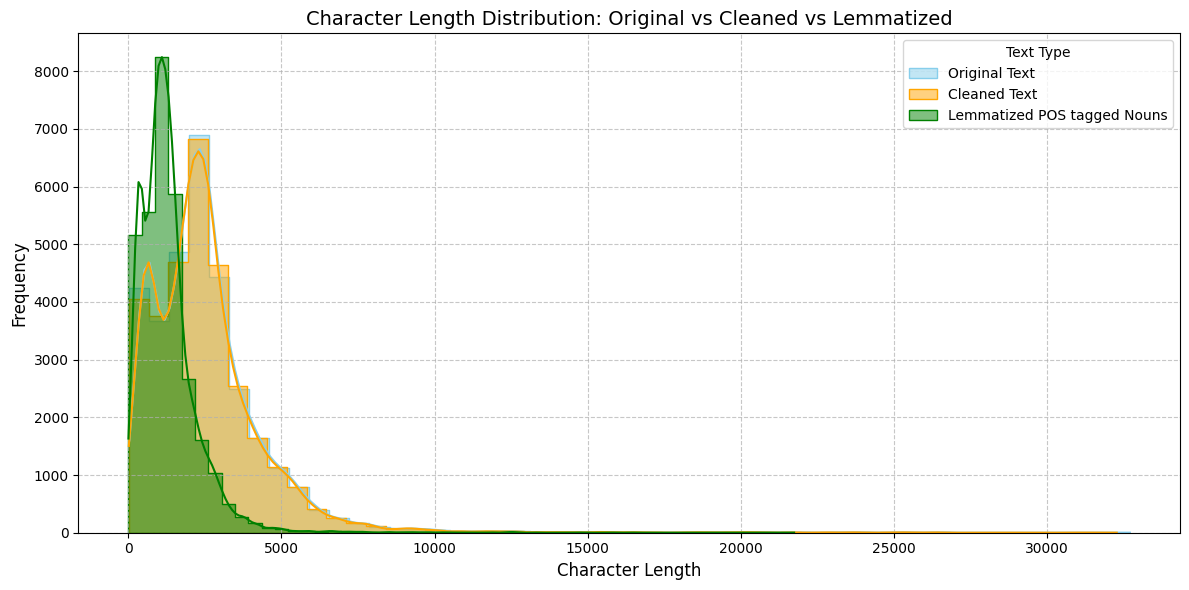

In [125]:
plt.figure(figsize=(12, 6))

# Create a histogram plot to visualise character lengths
sns.histplot(train_df['origianl_text_len'], color='skyblue', label='Original Text', kde=True, bins=50, alpha=0.5, element="step")
# Add histogram for cleaned news text
sns.histplot(train_df['cleaned_text_len'], color='orange', label='Cleaned Text', kde=True, bins=50, alpha=0.5, element="step")
# Add histogram for lemmatized news text with POS tags removed
sns.histplot(train_df['processed_text_len'], color='green', label='Lemmatized POS tagged Nouns', kde=True, bins=50, alpha=0.5, element="step")

plt.title('Character Length Distribution: Original vs Cleaned vs Lemmatized', fontsize=14)
plt.xlabel('Character Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title="Text Type")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

From above graph its clean that there very negligible much diffrence between original and cleaned text

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

{"state'": 1.0, "year'": 0.9999037628717159, "government'": 0.8817245693388509, "country'": 0.6675007217784621, "people'": 0.6386295832932345, "trump'": 0.620248291790973, "week'": 0.5587527668174381, "month'": 0.535559618900972, "time'": 0.5151573477047445, "official'": 0.430949860456164, "group'": 0.41988259070349343, "statement'": 0.3970743913001636, "day'": 0.3763834087190838, "president' donald'": 0.3446251563853335, "party'": 0.32220190549514005, "tuesday'": 0.3204696371860264, "issue'": 0.3094023674333558, "monday'": 0.30882494466365124, "plan'": 0.30170339717062844, "leader'": 0.29044365316138965, "part'": 0.28986623039168513, "law'": 0.2842844769512078, "way'": 0.28081994033298047, "support'": 0.27494947550765086, "wednesday'": 0.2711962275045713, "thursday'": 0.2685978250409008, "policy'": 0.26753921662977576, "friday'": 0.2599364834953325, "company'": 0.25907034934077566, "donald' trump'": 0.25907034934077566, "deal'": 0.24704070830526417, "election'": 0.2467519969204119, "e

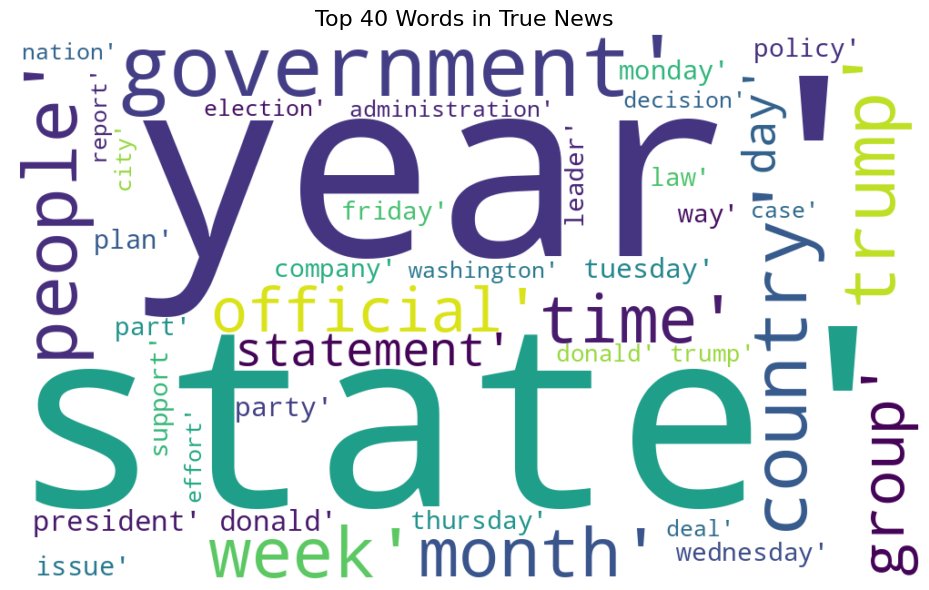

In [150]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

# Filter news with label 1 (True News) and convert to it string and handle any non-string values
train_true_df = train_df[train_df['news_label'] == 1].copy()
all_text = ' '.join(train_true_df['processed_text'])

# Generate word cloud for True News
wordcloud = WordCloud(width=1000, height=600,
                      background_color='white',
                      max_words=40,
                      colormap='viridis').generate(all_text)
print(wordcloud.words_)
# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Words in True News", fontsize=16)
plt.tight_layout()
plt.show()


##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

{"trump'": 1.0, "people'": 0.8825095330599324, "time'": 0.6915605439240233, "year'": 0.65961579969782, "president'": 0.504496726383193, "state'": 0.4783797395496079, "way'": 0.4342758471832506, "day'": 0.3913950643931218, "clinton'": 0.3792359162529678, "country'": 0.3677962443341248, "thing'": 0.33959277645873803, "woman'": 0.33959277645873803, "medium'": 0.3324699618677603, "government'": 0.3107417799841715, "fact'": 0.3045542844808979, "twitter' com'": 0.30376286063745594, "video'": 0.302180012950572, "house'": 0.29786315562270665, "man'": 0.2806676739333765, "news'": 0.2762788689833801, "week'": 0.2762788689833801, "america'": 0.26332829699978416, "party'": 0.24973019641700842, "american'": 0.24706813439815814, "report'": 0.24634865817684726, "president' trump'": 0.23965752931865603, "obama'": 0.23893805309734514, "group'": 0.23814662925390315, "pic' twitter'": 0.23246276710554717, "donald' trump'": 0.2290092812432549, "world'": 0.2289373336211238, "today'": 0.2284337002662062, "pa

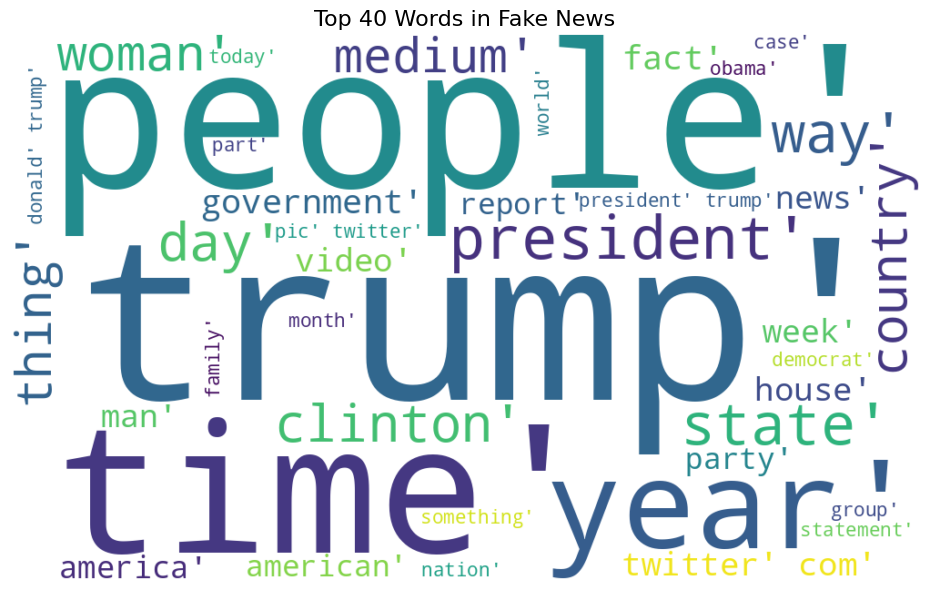

In [151]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
train_fake_df = train_df[train_df['news_label'] == 0].copy()
all_text = ' '.join(train_fake_df['processed_text'])

# Generate word cloud for Fake News
wordcloud = WordCloud(width=1000, height=600,
                      background_color='white',
                      max_words=40,
                      colormap='viridis').generate(all_text)
print(wordcloud.words_)
# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Words in Fake News", fontsize=16)
plt.tight_layout()
plt.show()


### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [129]:
# Write a function to get the specified top n-grams
true_news = train_df[train_df['news_label'] == 1]['processed_text']
fake_news = train_df[train_df['news_label'] == 0]['processed_text']

def plot_ngrams(corpus, ngram_range=(1,1), top_n=20, title='', color='skyblue'):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)[:top_n]
    print("word_freq: ",word_freq)
    # Convert to DataFrame for easy plotting
    df_ngram = pd.DataFrame(word_freq, columns=['n-gram', 'frequency'])
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(df_ngram['n-gram'][::-1], df_ngram['frequency'][::-1], color=color)
    plt.title(title, fontsize=14)
    plt.xlabel('Frequency')
    plt.tight_layout()
    plt.show()

true_corpus = true_news.tolist()
fake_corpus = fake_news.tolist()

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

word_freq:  [('trump', 32646), ('state', 26822), ('president', 20448), ('reuters', 17444), ('year', 16205), ('government', 14205), ('house', 12847), ('party', 11123), ('people', 10988), ('election', 10845)]


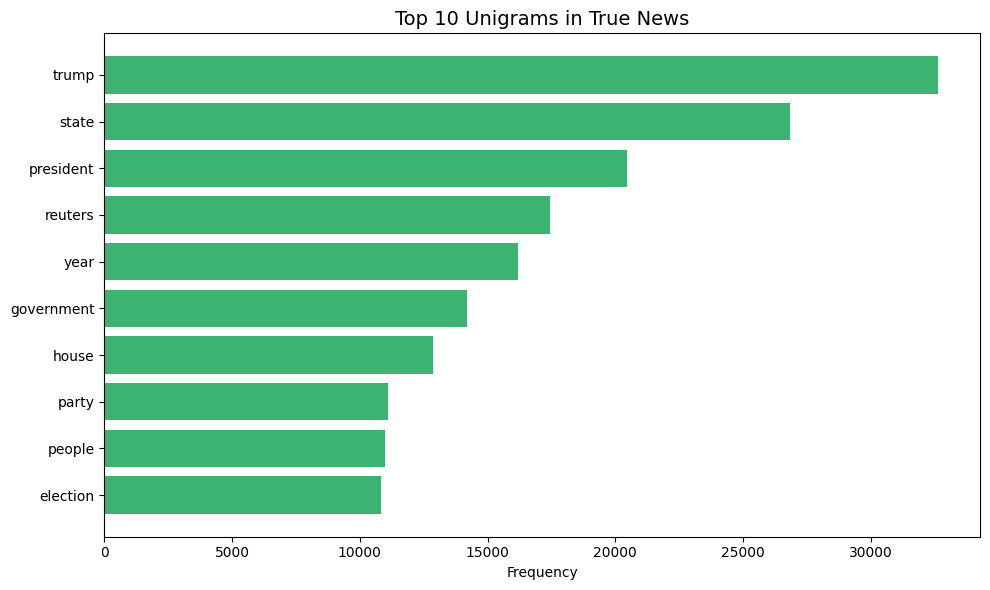

In [130]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
plot_ngrams(true_corpus, (1,1), 10, "Top 10 Unigrams in True News", 'mediumseagreen')

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



word_freq:  [('president donald', 3581), ('donald trump', 2704), ('washington reuters', 2327), ('reuters president', 2213), ('president barack', 1989), ('barack obama', 1968), ('secretary state', 1649), ('house representative', 1592), ('state department', 1386), ('trump administration', 1312)]


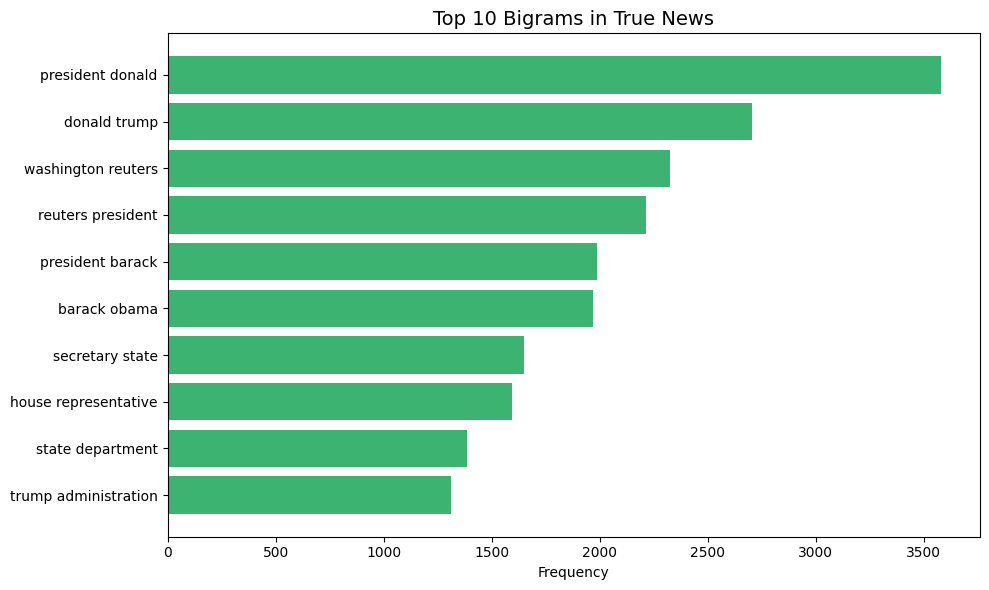

In [131]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
plot_ngrams(true_corpus, (2,2), 10, "Top 10 Bigrams in True News", 'mediumseagreen')

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



word_freq:  [('president barack obama', 1761), ('president donald trump', 1655), ('reuters president donald', 920), ('washington reuters president', 766), ('secretary state rex', 463), ('president vladimir putin', 450), ('state rex tillerson', 445), ('speaker paul ryan', 383), ('leader mitch mcconnell', 365), ('majority leader mitch', 326)]


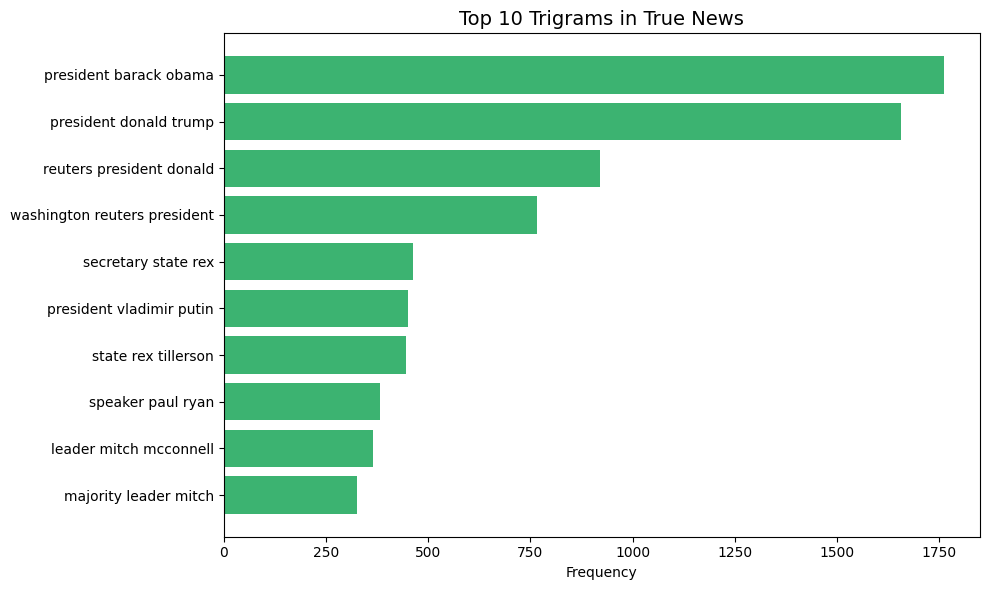

In [132]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
plot_ngrams(true_corpus, (3,3), 10, "Top 10 Trigrams in True News", 'mediumseagreen')

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

word_freq:  [('trump', 50357), ('president', 20585), ('people', 18633), ('state', 15788), ('time', 13565), ('year', 13553), ('clinton', 13295), ('news', 10556), ('image', 10133), ('obama', 8930)]


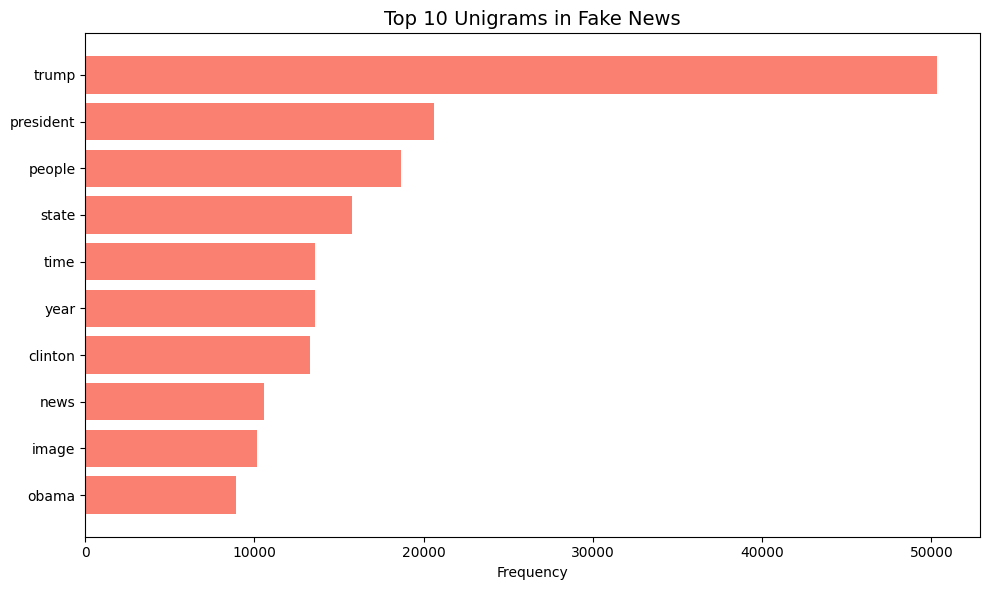

In [133]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
plot_ngrams(fake_corpus, (1,1), 10, "Top 10 Unigrams in Fake News", 'salmon')

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



word_freq:  [('twitter com', 4222), ('donald trump', 3887), ('president trump', 3335), ('pic twitter', 3231), ('getty image', 2264), ('president obama', 1948), ('trump campaign', 1531), ('trump supporter', 1423), ('century wire', 1313), ('barack obama', 1276)]


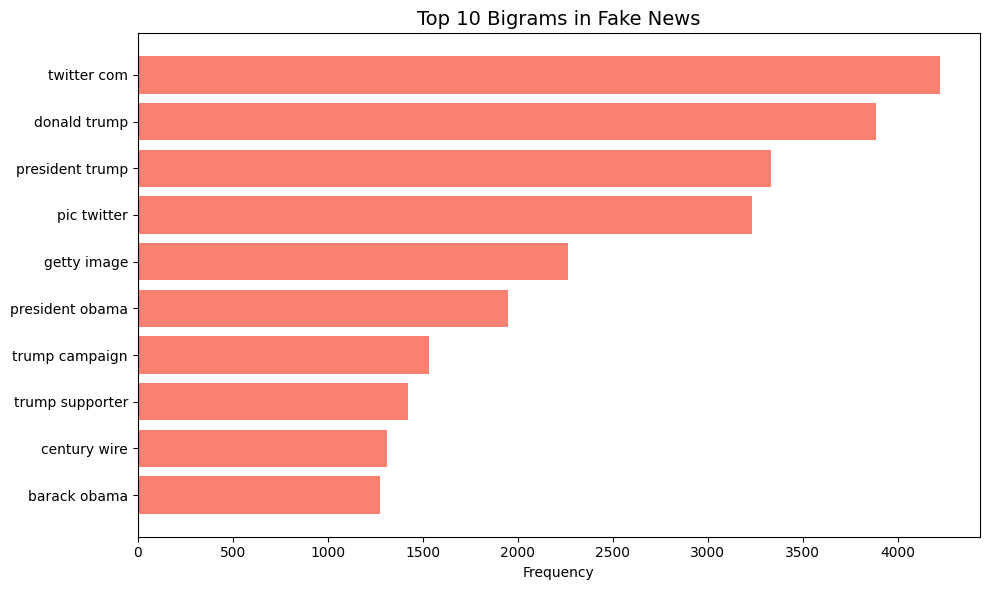

In [134]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
plot_ngrams(fake_corpus, (2,2), 10, "Top 10 Bigrams in Fake News", 'salmon')

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



word_freq:  [('pic twitter com', 3025), ('news century wire', 644), ('donald trump realdonaldtrump', 569), ('president barack obama', 545), ('image video screen', 429), ('video screen capture', 407), ('president donald trump', 353), ('co pic twitter', 302), ('chip somodevilla getty', 297), ('somodevilla getty image', 290)]


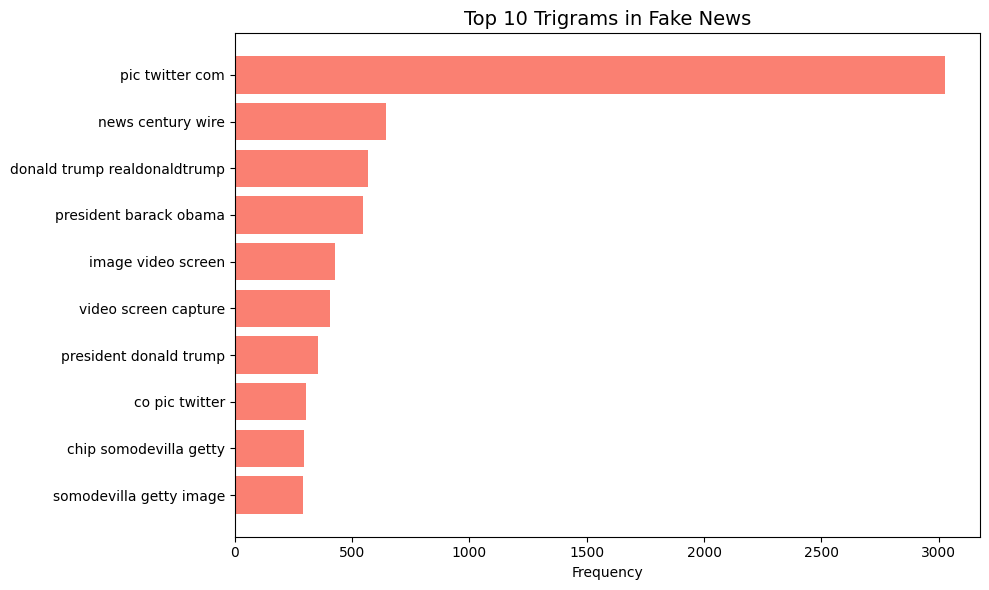

In [135]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
plot_ngrams(fake_corpus, (3,3), 10, "Top 10 Trigrams in Fake News", 'salmon')

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [136]:
# Add a new column to calculate the character length of original news text
val_df['origianl_text_len'] = val_df['news_text'].str.len()
# Add a new column to calculate the character length of cleaned news text
val_df['cleaned_text_len'] = val_df['cleaned_text'].str.len()
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
val_df['processed_text_len'] = val_df['processed_text'].str.len()
val_df.head(5)


news_text  \
22216   Spicer Claims Trump’s ‘Covfefe’ Tweet Wasn’t ...   
27917  LOL! WHY THIS LIST OF GOP “Leaders” Have NO Bu...   
25007  Lebanon's Hariri signals may withdraw resignat...   
1377   Attorney Olmem joins White House economic coun...   
32476  NYC MAYOR DE BLASIO…Putting Illegal Aliens Bef...   

                                            cleaned_text  \
22216   spicer claims trump s  covfefe  tweet wasn t ...   
27917  lol  why this list of gop  leaders  have no bu...   
25007  lebanon s hariri signals may withdraw resignat...   
1377   attorney olmem joins white house economic coun...   
32476  nyc mayor de blasio putting illegal aliens bef...   

                                          processed_text  news_label  \
22216  ['spicer', 'claim', 'covfefe', 'tweet', 'repor...           0   
27917  ['lol', 'list', 'gop', 'leader', 'business', '...           0   
25007  ['lebanon', 'hariri', 'signal', 'resignation',...           1   
1377   ['attorney', 'olmem', 'house', 'council', 'sou...           1   
32476  ['mayor', 'alien', 'safety', 'american', 'drun...           0   

       origianl_text_len  cleaned_text_len  processed_text_len  
22216               1237              1237                 590  
27917               7803              7710                3692  
25007               2570              2567                1236  
1377                1046              1042                 588  
32476                940               927                 500

##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

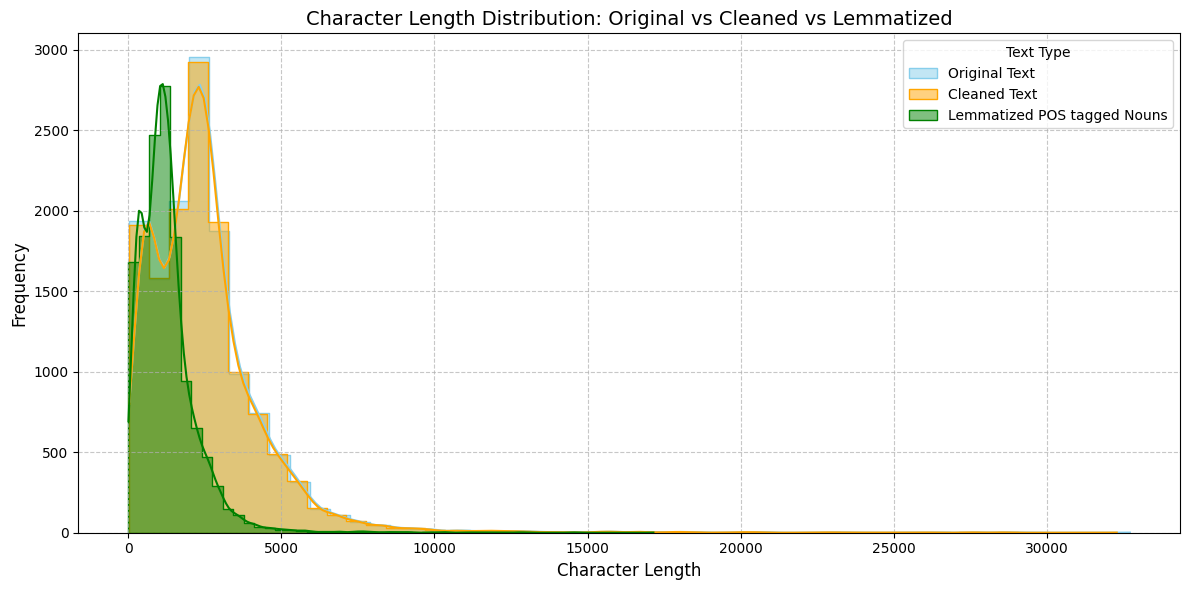

In [137]:
plt.figure(figsize=(12, 6))

# Create a histogram plot to visualise character lengths
sns.histplot(val_df['origianl_text_len'], color='skyblue', label='Original Text', kde=True, bins=50, alpha=0.5, element="step")
# Add histogram for cleaned news text
sns.histplot(val_df['cleaned_text_len'], color='orange', label='Cleaned Text', kde=True, bins=50, alpha=0.5, element="step")
# Add histogram for lemmatized news text with POS tags removed
sns.histplot(val_df['processed_text_len'], color='green', label='Lemmatized POS tagged Nouns', kde=True, bins=50, alpha=0.5, element="step")

plt.title('Character Length Distribution: Original vs Cleaned vs Lemmatized', fontsize=14)
plt.xlabel('Character Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title="Text Type")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

{"state'": 1.0, "trump'": 0.8485451761102604, "year'": 0.7826952526799388, "government'": 0.7577335375191424, "people'": 0.530781010719755, "country'": 0.5151607963246554, "week'": 0.4408882082695253, "time'": 0.3963246554364472, "month'": 0.3854517611026034, "official'": 0.35987748851454826, "group'": 0.348698315467075, "party'": 0.342572741194487, "day'": 0.3010719754977029, "statement'": 0.2987748851454824, "election'": 0.2797856049004594, "president'": 0.27197549770290963, "law'": 0.255895865237366, "monday'": 0.2509954058192956, "issue'": 0.24640122511485452, "leader'": 0.2445635528330781, "policy'": 0.23660030627871362, "tuesday'": 0.23629402756508422, "part'": 0.2346094946401225, "house'": 0.2341500765696784, "wednesday'": 0.22924961715160797, "friday'": 0.22833078101071977, "president' donald'": 0.22679938744257275, "thursday'": 0.22189892802450228, "reuters'": 0.21822358346094947, "china'": 0.21822358346094947, "campaign'": 0.21562021439509954, "washington'": 0.207810107197549

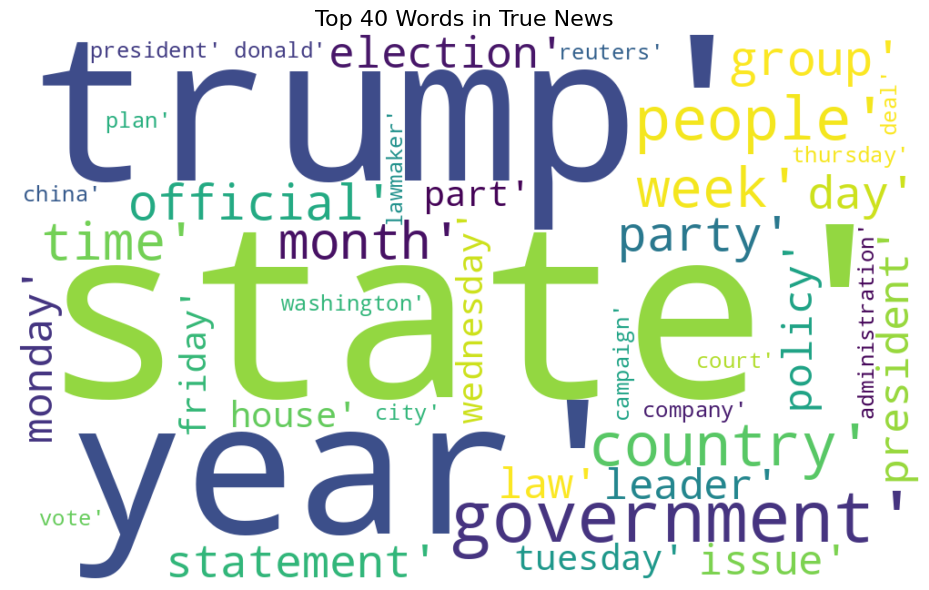

In [152]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News

val_true_df = val_df[val_df['news_label'] == 1].copy()
all_text = ' '.join(val_true_df['processed_text'])

# Generate word cloud for True News
wordcloud = WordCloud(width=1000, height=600,
                      background_color='white',
                      max_words=40,
                      colormap='viridis').generate(all_text)
print(wordcloud.words_)
# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Words in True News", fontsize=16)
plt.tight_layout()
plt.show()


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

{"trump'": 1.0, "people'": 0.6565746512318196, "year'": 0.45582269714059565, "time'": 0.45235975066785394, "president'": 0.3862669437023845, "state'": 0.37627386959533, "clinton'": 0.3113683585633719, "country'": 0.2895023251212031, "way'": 0.26466805184525577, "day'": 0.24329672504205008, "thing'": 0.24280201840308696, "woman'": 0.24181260512516078, "medium'": 0.2414168398139903, "government'": 0.23864648263579696, "house'": 0.2273671712674384, "video'": 0.21757197981596912, "fact'": 0.20738102305332937, "news'": 0.201246660730187, "obama'": 0.1773028594043732, "party'": 0.17651132878203227, "man'": 0.17601662214306915, "twitter' com'": 0.17601662214306915, "group'": 0.17383991293163154, "report'": 0.1715642623924013, "america'": 0.17087167309785298, "american'": 0.17057484911447512, "week'": 0.1704759077866825, "campaign'": 0.16849708123083013, "world'": 0.16444048679133275, "election'": 0.15316117542297417, "republican'": 0.15147917285049967, "nation'": 0.14989611160581776, "part'":

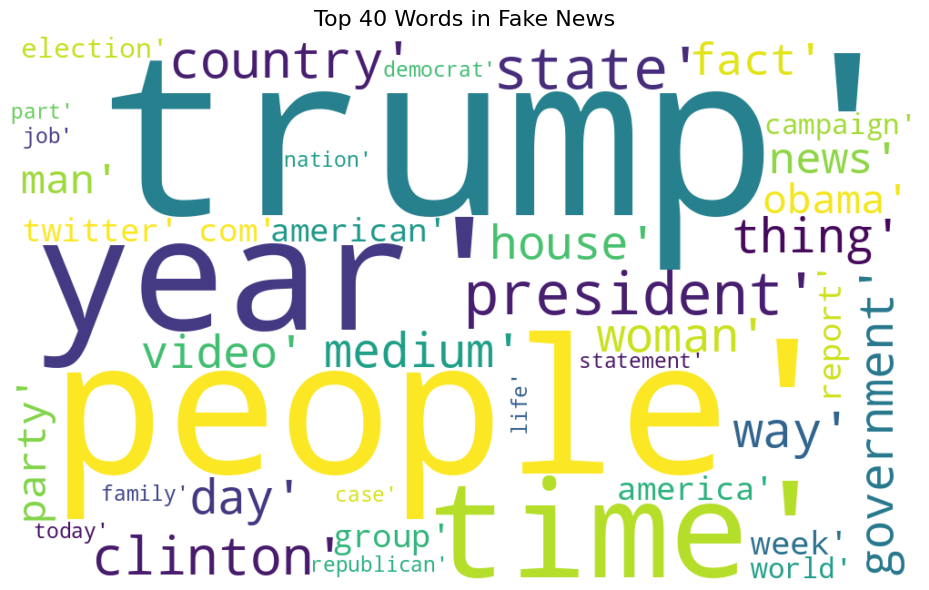

In [153]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News

val_fake_df = val_df[val_df['news_label'] == 0].copy()
all_text = ' '.join(val_fake_df['processed_text'])

# Generate word cloud for Fake News
wordcloud = WordCloud(width=1000, height=600,
                      background_color='white',
                      max_words=40,
                      colormap='viridis').generate(all_text)
print(wordcloud.words_)
# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Words in Fake News", fontsize=16)
plt.tight_layout()
plt.show()



### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [142]:
## Write a function to get the specified top n-grams
true_news = val_df[val_df['news_label'] == 1]['processed_text']
fake_news = val_df[val_df['news_label'] == 0]['processed_text']

def plot_ngrams(corpus, ngram_range=(1,1), top_n=20, title='', color='skyblue'):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)[:top_n]
    print("word_freq: ",word_freq)
    # Convert to DataFrame for easy plotting
    df_ngram = pd.DataFrame(word_freq, columns=['n-gram', 'frequency'])
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(df_ngram['n-gram'][::-1], df_ngram['frequency'][::-1], color=color)
    plt.title(title, fontsize=14)
    plt.xlabel('Frequency')
    plt.tight_layout()
    plt.show()

true_corpus = true_news.tolist()
fake_corpus = fake_news.tolist()

##### 5.3.2 Handle the NaN values

In [143]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

word_freq:  [('trump', 14155), ('state', 10939), ('president', 8806), ('reuters', 7381), ('year', 6668), ('government', 6207), ('house', 5634), ('party', 4587), ('election', 4570), ('people', 4469)]


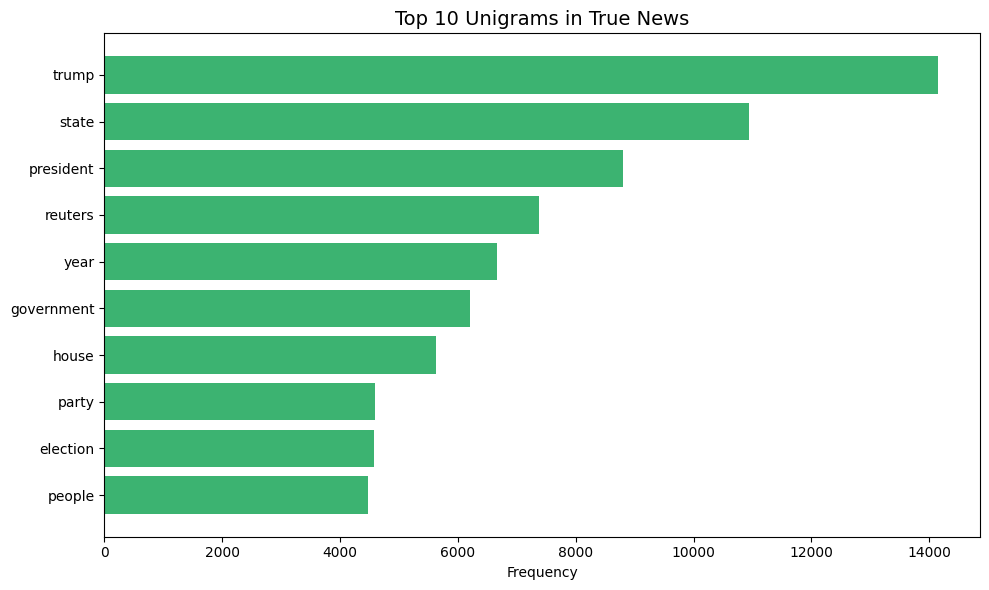

In [144]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
plot_ngrams(true_corpus, (1,1), 10, "Top 10 Unigrams in True News", 'mediumseagreen')

##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

word_freq:  [('president donald', 1481), ('donald trump', 1189), ('washington reuters', 1001), ('reuters president', 884), ('president barack', 863), ('barack obama', 856), ('secretary state', 712), ('house representative', 681), ('state department', 594), ('trump administration', 594)]


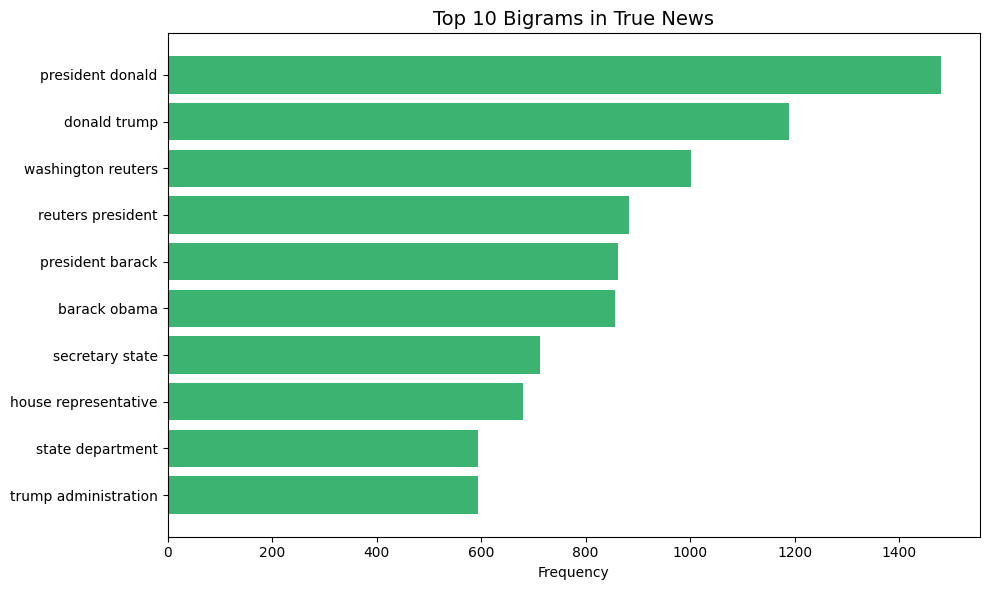

In [145]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
plot_ngrams(true_corpus, (2,2), 10, "Top 10 Bigrams in True News", 'mediumseagreen')

##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

word_freq:  [('president barack obama', 767), ('president donald trump', 701), ('reuters president donald', 376), ('washington reuters president', 314), ('president vladimir putin', 215), ('secretary state rex', 209), ('state rex tillerson', 199), ('chancellor angela merkel', 147), ('speaker paul ryan', 144), ('leader mitch mcconnell', 126)]


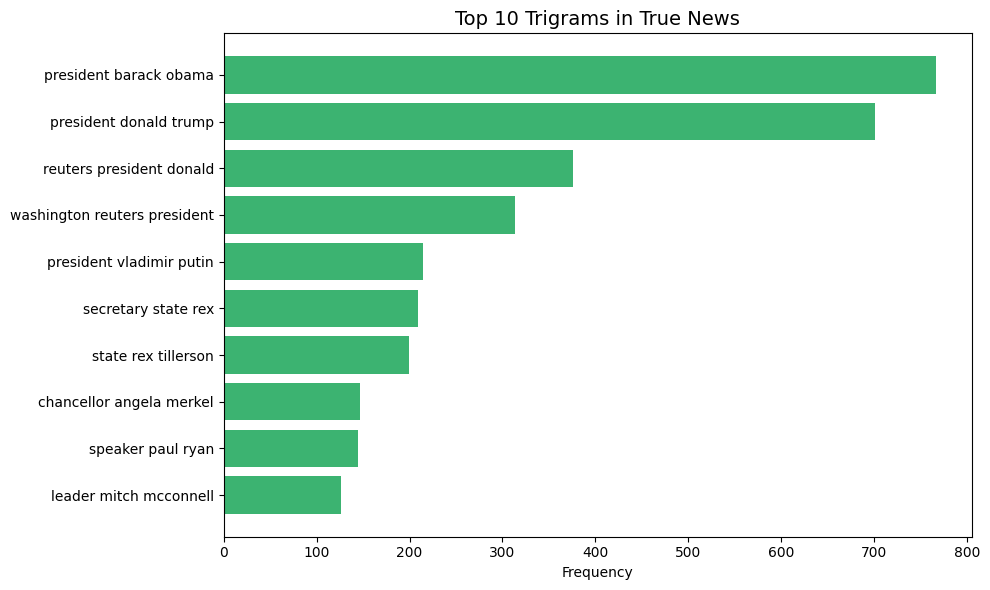

In [146]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
plot_ngrams(true_corpus, (3,3), 10, "Top 10 Trigrams in True News", 'mediumseagreen')

### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

word_freq:  [('trump', 21509), ('president', 8686), ('people', 8361), ('state', 7171), ('clinton', 6004), ('year', 5736), ('time', 5660), ('news', 4660), ('image', 4402), ('obama', 3879)]


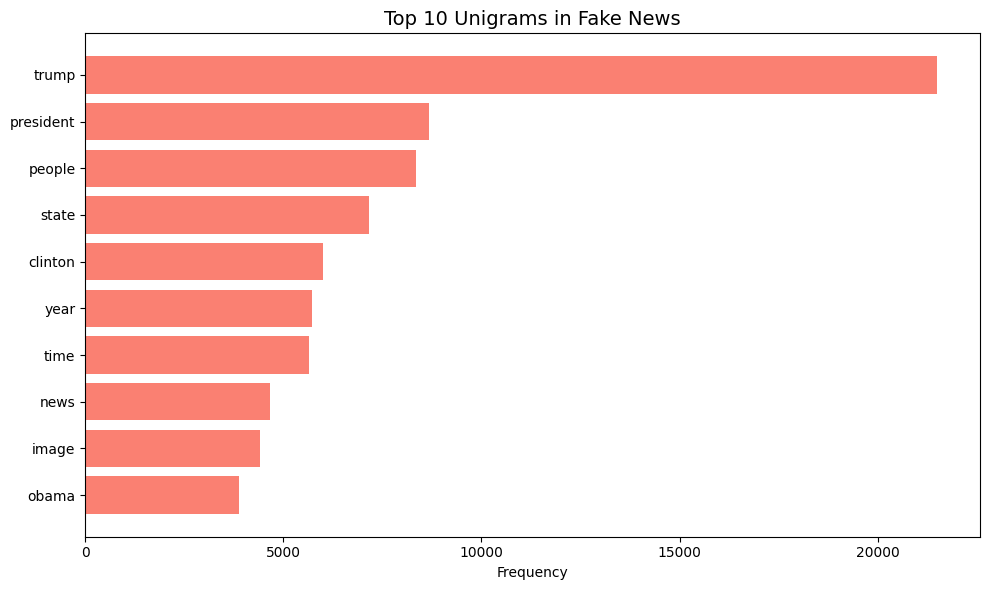

In [147]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
plot_ngrams(fake_corpus, (1,1), 10, "Top 10 Unigrams in Fake News", 'salmon')

##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

word_freq:  [('twitter com', 1779), ('donald trump', 1729), ('pic twitter', 1362), ('president trump', 1333), ('getty image', 964), ('president obama', 842), ('trump supporter', 636), ('trump campaign', 620), ('http co', 588), ('barack obama', 577)]


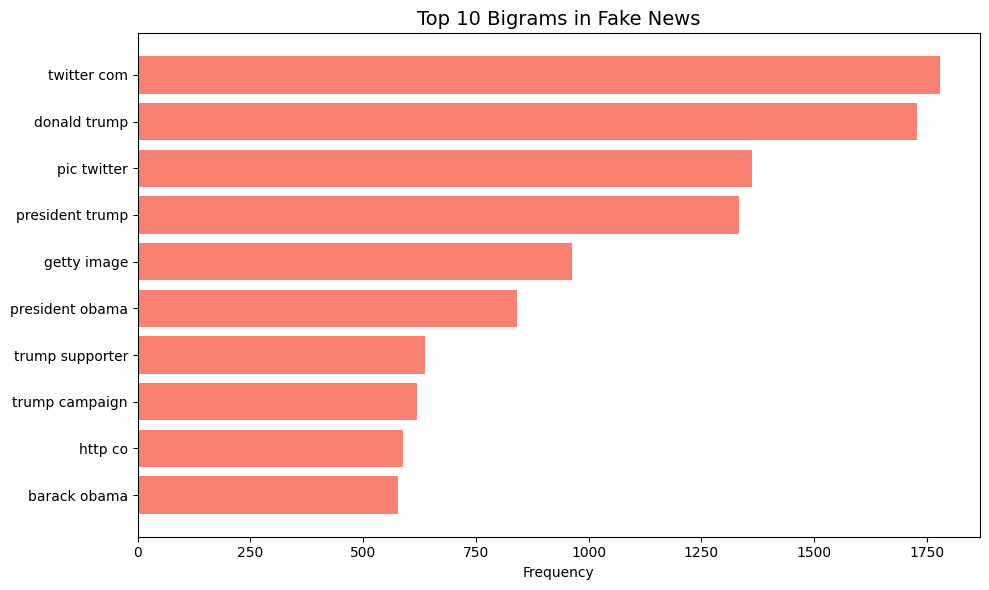

In [148]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
plot_ngrams(fake_corpus, (2,2), 10, "Top 10 Bigrams in Fake News", 'salmon')

##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

word_freq:  [('pic twitter com', 1286), ('news century wire', 285), ('president barack obama', 258), ('donald trump realdonaldtrump', 237), ('image video screen', 166), ('co pic twitter', 166), ('president donald trump', 158), ('video screen capture', 156), ('chip somodevilla getty', 127), ('somodevilla getty image', 127)]


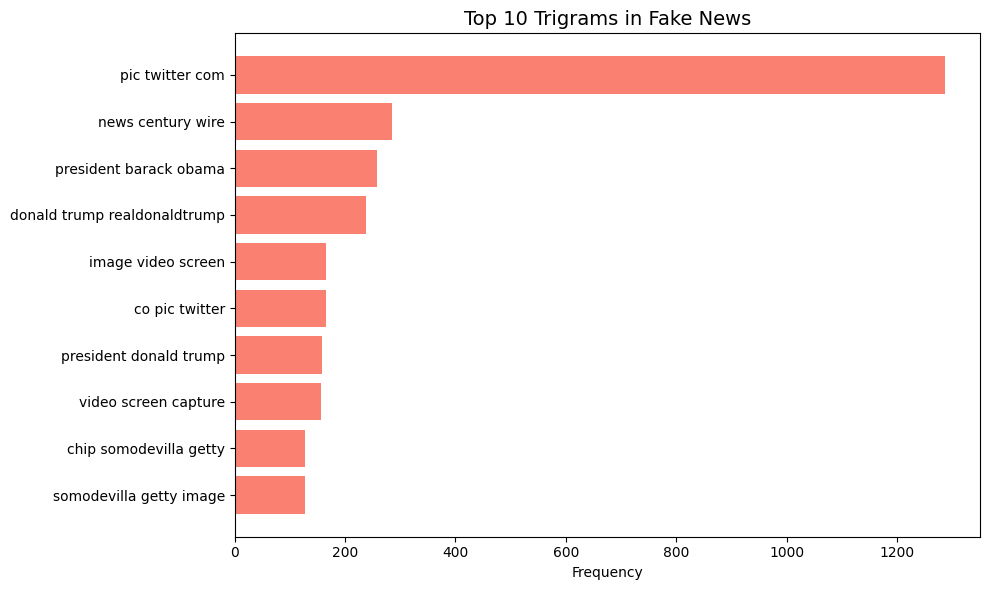

In [149]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
plot_ngrams(fake_corpus, (3,3), 10, "Top 10 Trigrams in Fake News", 'salmon')

## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [80]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
w2v_model = api.load('word2vec-google-news-300')

In [83]:
y_train.head()

13970    0
41668    1
26810    0
30967    0
26072    1
Name: news_label, dtype: int64

### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [86]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
def vector_ducs(tokens, model):
    vectores = [model[word] for word in tokens if word in model]
    if not vectores:
        return np.zeros(model.vector_size, dtype=float)
    return np.mean(vectores, axis=0)

X_train_vector = np.vstack(X_train["processed_text"].apply(lambda x: vector_ducs(x, w2v_model)))
X_val_vector = np.vstack(X_val["processed_text"].apply(lambda x: vector_ducs(x, w2v_model)))

## Extract the target variable for the training data and validation data

print("X_train_vec shape:", X_train_vector.shape)  
print("X_val_vec shape:",   X_val_vector.shape)     
print("y_train shape:",     y_train.shape)      
print("y_val shape:",       y_val.shape)  


X_train_vec shape: (31428, 300)
X_val_vec shape: (13470, 300)
y_train shape: (31428,)
y_val shape: (13470,)


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [100]:
## Initialise Logistic Regression model
logisticreg = LogisticRegression(max_iter=1000)
## Train Logistic Regression model on training data
logisticreg.fit(X_train_vector, y_train)
## Predict on validation 
y_pred_lr = logisticreg.predict(X_val_vector)


##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [101]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy  = accuracy_score(y_val, y_pred_lr)
precision = precision_score(y_val, y_pred_lr)
recall    = recall_score(y_val, y_pred_lr)
f1        = f1_score(y_val, y_pred_lr)

# 2. Print the scores
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

Accuracy : 0.7169
Precision: 0.7007
Recall   : 0.6959
F1-Score : 0.6983


In [102]:
# Classification Report
print(classification_report(y_val, y_pred_lr))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      7130
           1       0.70      0.70      0.70      6340

    accuracy                           0.72     13470
   macro avg       0.72      0.72      0.72     13470
weighted avg       0.72      0.72      0.72     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [104]:
## Initialise Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

## Train Decision Tree model on training data
decision_tree.fit(X_train_vector, y_train)

## Predict on validation data
y_pred_dt = decision_tree.predict(X_val_vector)


##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [105]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy  = accuracy_score(y_val, y_pred_dt)
precision = precision_score(y_val, y_pred_dt)
recall    = recall_score(y_val, y_pred_dt)
f1        = f1_score(y_val, y_pred_dt)

# 2. Print the scores
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

Accuracy : 0.7106
Precision: 0.7051
Recall   : 0.6621
F1-Score : 0.6829


In [106]:
# Classification Report
print(classification_report(y_val, y_pred_dt))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73      7130
           1       0.71      0.66      0.68      6340

    accuracy                           0.71     13470
   macro avg       0.71      0.71      0.71     13470
weighted avg       0.71      0.71      0.71     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [117]:
## Initialise Random Forest model
random_forest = RandomForestClassifier(
    n_estimators=200,      
    max_depth=15,        
    random_state=42,
    n_jobs=-1              
)
## Train Random Forest model on training data
random_forest.fit(X_train_vector, y_train)

## Predict on validation data
y_pred_rf = random_forest.predict(X_val_vector)


 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [118]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy  = accuracy_score(y_val, y_pred_rf)
precision = precision_score(y_val, y_pred_rf)
recall    = recall_score(y_val, y_pred_rf)
f1        = f1_score(y_val, y_pred_rf)


print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

Accuracy : 0.7938
Precision: 0.7778
Recall   : 0.7864
F1-Score : 0.7821


In [116]:
# Classification Report
print(classification_report(y_val, y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      7130
           1       0.78      0.78      0.78      6340

    accuracy                           0.79     13470
   macro avg       0.79      0.79      0.79     13470
weighted avg       0.79      0.79      0.79     13470



## **8.** Conclusion <font color = red>[5 marks]</font>



* The original and cleaned news texts have similar character lengths, but the processed texts—after lemmatization and stop-word removal—show a marked reduction in length.
* In both the training and validation sets, “state” and “trump” are among the most frequent words, likely reflecting election-related content.
* The prominence of names like “Obama” and “Trump” suggests the dataset was drawn from U.S. news around the 2016 election.
* Unigrams, bigrams, and trigrams effectively capture single words, two-word phrases, and three-word sequences, respectively.
* The Random Forest classifier outperforms both Logistic Regression and the Decision Tree models on this task.